In [29]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [30]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
 
rows, cols = 28, 28
 
x_train = x_train.reshape(x_train.shape[0], rows, cols, 1)
x_test = x_test.reshape(x_test.shape[0], rows, cols, 1)
 
input_shape = (rows, cols, 1)

11493376/11490434 [==============================] - 25s 2us/step


In [31]:
# convert to float and normalize
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255.0
x_test = x_test / 255.0

In [32]:
# one-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [39]:
def build_lenet(input_shape):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Conv2D(filters=6, 
                                   kernel_size=(5, 5), 
                                   strides=(1, 1),
                                   activation='tanh', 
                                   input_shape=input_shape))
    model.add(tf.keras.layers.AveragePooling2D(pool_size=(2, 2), 
                                             strides=(2, 2)))
    model.add(tf.keras.layers.Conv2D(filters=16, 
                                   kernel_size=(5, 5), 
                                   strides=(1, 1), 
                                   activation='tanh'))
    model.add(tf.keras.layers.AveragePooling2D(pool_size=(2, 2), 
                                             strides=(2, 2)))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(units=120, 
                                   activation='tanh'))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(units=84, activation='tanh'))
    model.add(tf.keras.layers.Dense(units=10, activation='softmax'))
    model.compile(loss='categorical_crossentropy', 
              optimizer=tf.keras.optimizers.Adam(lr=0.1, momentum=0.0, decay=0.0), 
              metrics=['accuracy'])
    return model


In [34]:
lenet = build_lenet(input_shape)

In [35]:
# train the model
epochs = 10
history = lenet.fit(x_train, y_train,
                           epochs=epochs, 
                           batch_size=128,
                           verbose=1)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 27s 449us/sample - loss: 0.4142 - accuracy: 0.8819
Epoch 2/10
60000/60000 [==============================] - 15s 246us/sample - loss: 0.1639 - accuracy: 0.9520
Epoch 3/10
60000/60000 [==============================] - 14s 238us/sample - loss: 0.1084 - accuracy: 0.9680
Epoch 4/10
60000/60000 [==============================] - 15s 245us/sample - loss: 0.0828 - accuracy: 0.9750- los
Epoch 5/10
60000/60000 [==============================] - 14s 237us/sample - loss: 0.0681 - accuracy: 0.9798
Epoch 6/10
60000/60000 [==============================] - 16s 265us/sample - loss: 0.0584 - accuracy: 0.9825
Epoch 7/10
60000/60000 [==============================] - 16s 259us/sample - loss: 0.0516 - accuracy: 0.9843
Epoch 8/10
60000/60000 [==============================] - 15s 258us/sample - loss: 0.0459 - accuracy: 0.9864
Epoch 9/10
60000/60000 [==============================] - 15s 248us/sample - loss: 0.0414 - accuracy

In [36]:
#test the model
loss, acc = lenet.evaluate(x_test, y_test)
print('ACCURACY: ', acc)

10000/10000 [==============================] - 8s 805us/sample - loss: 0.0419 - accuracy: 0.9862
ACCURACY:  0.9862


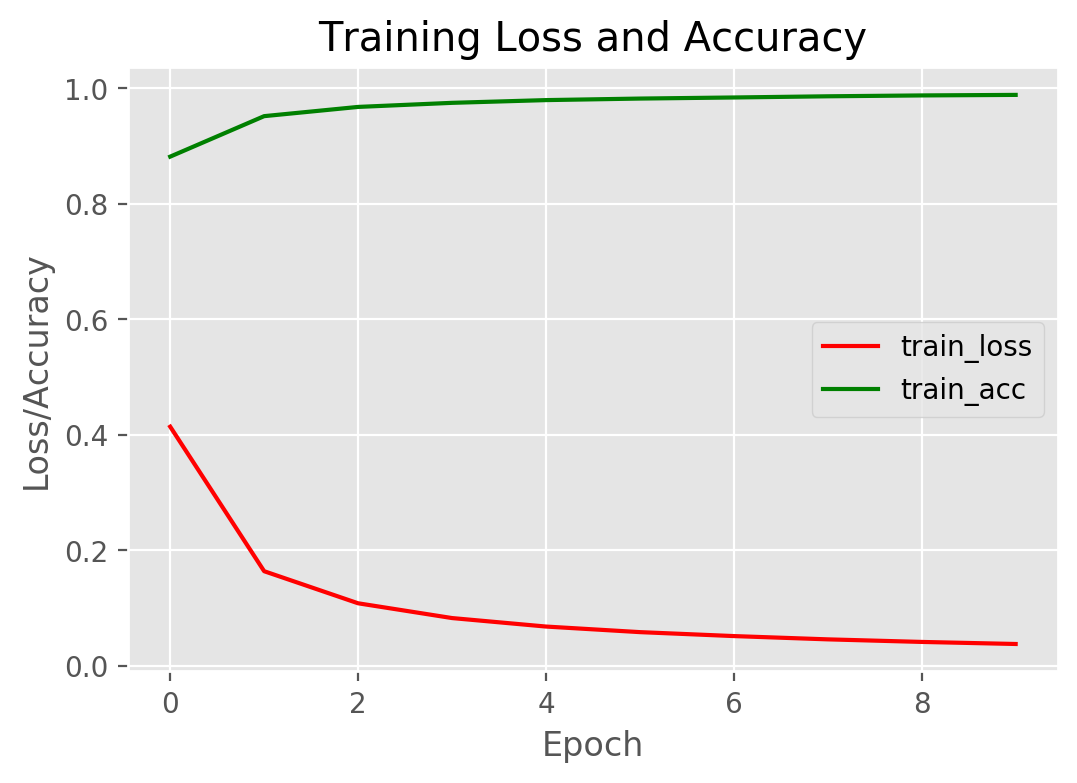

In [37]:
#Accuracy and loss plots
num_epochs = np.arange(0, 10)
plt.figure(dpi=200)
plt.style.use('ggplot')
plt.plot(num_epochs, history.history['loss'], label='train_loss', c='red')
plt.plot(num_epochs, history.history['accuracy'], label='train_acc', c='green')
plt.title('Training Loss and Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.savefig('plot.png')